## Loading of Stringer evoked

includes some visualizations

In [1]:
#@title Data retrieval - evoked
import os, requests

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [3]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
#@title Data loading
import numpy as np

#@title Data loading
evoked_dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(evoked_dat.keys())


dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


dat has fields:
* dat['sresp']: neurons by stimuli, a.k.a. the neural response data (23589 by 4598). Each 4598 trial is one second and has a specific orientation
* dat['run']: 1 by stimuli, a.k.a. the running speed of the animal in arbitrary units
* dat['istim']: 1 by stimuli, goes from 0 to 2*np.pi, the orientations shown on each trial
* dat['stat']: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.
* dat['stat'][k]['med']: 1 by 2, the position of each neuron k in tissue, in pixels, at a resolution of ~2um/pix. 
* dat['u_spont']: neurons by 128, the weights for the top 128 principal components of spontaneous activity. Unit norm.
* dat['v_spont']: 128 by 910, the timecourses for the top 128 PCs of spont activity.
* dat['u_spont'] @ dat['v_spont']: a reconstruction of the spontaneous activity for 910 timepoints interspersed throughout the recording.


dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (14752 by 8118). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details. 
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other. 
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

# **Process evoked data**

Layer depths: [-450. -425. -400. -375. -350. -325. -300. -275. -250. -225. -200. -175.
 -150.]


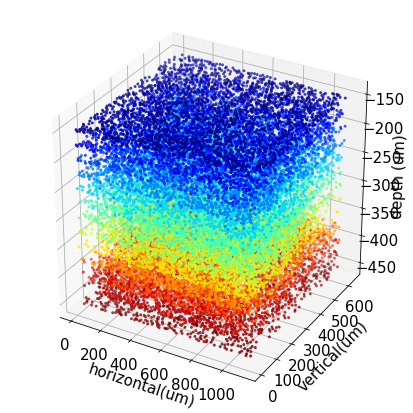

In [5]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = evoked_dat['xyz']
zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

print('Layer depths:', np.unique(z))

In [6]:
# ASSIGN LAYER LABELS TO EACH CELL
#L2/3 = 150 - 300
# L4 = 300 - 400
# L5 = 400 - 

abs_z = abs(z)
l2_evoked = np.where(abs_z < 300)[0]
l4_evoked = np.where(np.logical_and(abs_z >= 300, abs_z < 400))[0]
l5_evoked = np.where(abs_z >= 400)[0]

evoked_labels = np.zeros(z.shape[0])
evoked_labels[l2_evoked] = 2
evoked_labels[l4_evoked] = 4
evoked_labels[l5_evoked] = 5

In [7]:
l2_evoked_sample = np.random.choice(l2_evoked, len(l5_evoked))
l4_evoked_sample = np.random.choice(l4_evoked, len(l5_evoked))

evoked_labels_sample = np.zeros(z.shape[0])
evoked_labels_sample[l2_evoked_sample] = 2
evoked_labels_sample[l4_evoked_sample] = 4
evoked_labels_sample[l5_evoked] = 5

In [8]:
l2 = evoked_dat['sresp'][l2_evoked]
l4 = evoked_dat['sresp'][l4_evoked]
l5 = evoked_dat['sresp'][l5_evoked]

l2_sample = evoked_dat['sresp'][l2_evoked_sample]
l4_sample = evoked_dat['sresp'][l4_evoked_sample]

-150.0
-150.0
-150.0


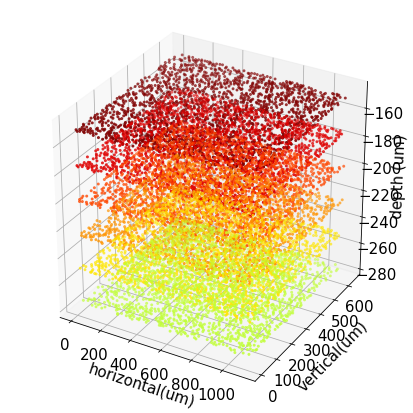

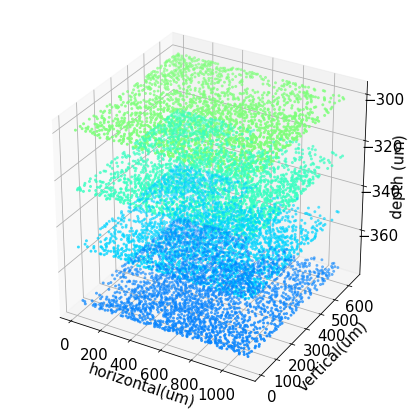

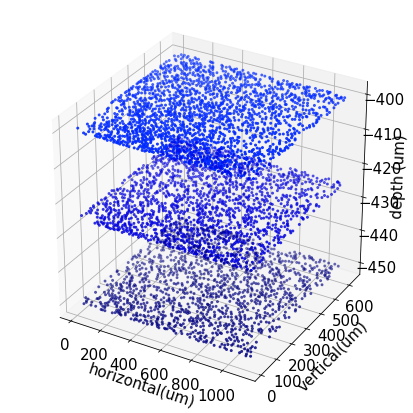

In [9]:
# @title plot the 3D positions of all neurons
label_vec = [2,4, 5]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
for i in label_vec:
  x, y, z = evoked_dat['xyz']
  print(np.max(z))
  zunq, iunq = np.unique(z, return_inverse=True)
  xc = np.linspace(0.0, 1.0, len(zunq))
  cmap = cm.get_cmap('jet')(xc)

  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111, projection='3d')
  current_layer = np.where(evoked_labels == i)[0]
  ax.scatter(x[current_layer],y[current_layer],z[current_layer], 'o', s = 4, c = cmap[iunq][current_layer])
  ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

# Color code and plot orientation selectivity of cells

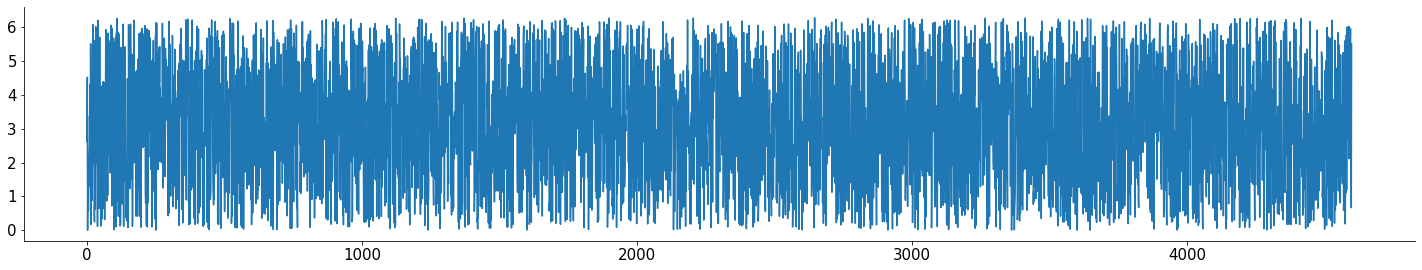

In [ ]:
plt.plot(evoked_dat['istim'])

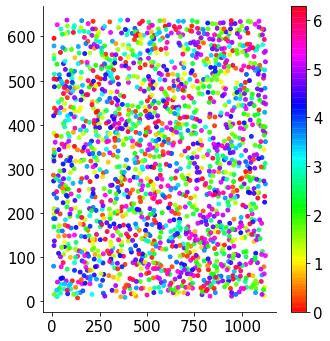

In [ ]:
pl_2 = evoked_dat['sresp'][np.where(z==-175)]
x_pl2, y_pl2, z_pl2 = evoked_dat['xyz'][:,np.where(z==-175)]
ori_select = evoked_dat['istim'][np.argmax(pl_2, axis=1)]

plt.figure(figsize=(5,5))
plt.scatter(x_pl2[0],y_pl2[0],c=ori_select, cmap='hsv', vmin = 0, vmax=2*np.pi, alpha = 0.9, s=15)
#plt.title(zi)
plt.colorbar()

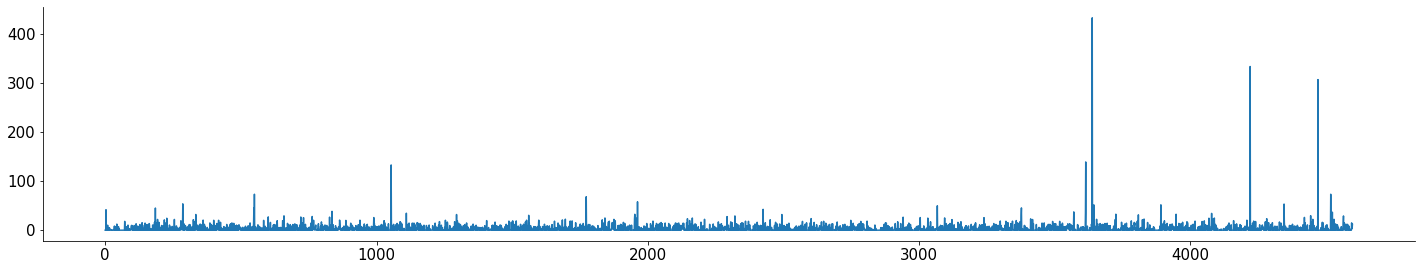

In [ ]:
plt.plot(pl_2[0])

In [ ]:
# If it looks like shit, it looks like shit

In [ ]:
# Make colormap that cycles to pi twice
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('plasma', 128)
bottom = cm.get_cmap('plasma', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(1, 0, 128))))
intermediate_cmp = ListedColormap(newcolors, name='')

top = intermediate_cmp
bottom = intermediate_cmp

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='2pi')
#plot_examples([newcmp])

In [ ]:
plt.close
plt.figure(figsize=(15,20))

for i, zi in enumerate(np.unique(z)):
  pl = evoked_dat['sresp'][np.where(z==zi)]
  x_pl, y_pl, z_pl = evoked_dat['xyz'][:,np.where(z==zi)]

  ori_select = evoked_dat['istim'][np.argmax(pl, axis=1)]

  plt.subplot(5,3,i+1)
  plt.scatter(x_pl[::-1],y_pl[::-1],c=ori_select, cmap=newcmp, vmin = 0, vmax=2*np.pi, alpha = 0.6, s=20)
  plt.title(zi)
  plt.colorbar()

# **Orientation selectivity**



In [10]:
stim = evoked_dat['istim']
resp = evoked_dat['sresp']

In [11]:
orientations = np.linspace(0, (2*np.pi), 21)[0:-1] # 20 stimuli bins, 18 degrees apar
stim_binned = stim.copy()

for i in range(len(stim_binned)):
  stim_binned[i] = orientations[np.argmin(abs(stim_binned[i] - orientations))] # Makes array of shape (stimuli, ), but with binned orientation values

stim_binned.shape

(4598,)

In [12]:
stim_frames = np.zeros((resp.shape[0], len(orientations)))

for i in range(len(orientations)):  
  stim_frames[:,i] = resp[:,np.where(stim_binned == orientations[i])[0]].mean(axis = 1) # Calculate mean response for each cell and orientation

stim_frames.shape

pref_idx = np.argmax(stim_frames, axis = 1)
nonpref_idx = pref_idx - 5
print('Preferred orientation Index:', nonpref_idx)
print('Orthogonal, nonpreferred orientation Index:', nonpref_idx)

Preferred orientation Index: [13 -1  5 ... 11  2  5]
Orthogonal, nonpreferred orientation Index: [13 -1  5 ... 11  2  5]


In [13]:
# Define orientation selectivity index (OSI) for every cell

osi = np.zeros(resp.shape[0])
ori_sel = np.zeros(resp.shape[0])

for i in range(resp.shape[0]):
  mu_max = stim_frames[i, pref_idx[i]]
  mu_orth = stim_frames[i, nonpref_idx[i]]

  osi[i] = (mu_max - mu_orth) / (mu_max + mu_orth)

  if osi[i] >= 0.3:
    ori_sel[i] = orientations[pref_idx[i]]
  else: 
    ori_sel[i] = np.nan

ori_sel.shape   # Array of shape (cells, ) with orentation selectivity (or NaN)

(23589,)

In [ ]:
# Number of not orientation selective cells
np.sum(np.isnan(ori_sel))

3024

In [ ]:
# Plot cells in all layers, color coded by orientation selectivity
plt.figure(figsize=(15,20))

for i, zi in enumerate(np.unique(z)):
  pl = evoked_dat['sresp'][np.where(z==zi)]
  x_pl, y_pl, z_pl = evoked_dat['xyz'][:,np.where(z==zi)]

  ori_select = ori_sel[np.argmax(pl, axis=1)]

  plt.subplot(5,3,i+1)
  plt.scatter(x_pl[::-1],y_pl[::-1],c=ori_select, cmap=newcmp, vmin = 0, vmax=2*np.pi, alpha = 0.6, s=30)
  plt.title(zi)
  plt.colorbar()

# **Split up data into test and train** 

In [ ]:
traces = evoked_dat['sresp']
stim = evoked_dat
evoked_labels[l2_evoked] = 2 #labels for layer 2
evoked_labels[l4_evoked] = 4 #labels for layer 4
evoked_labels[l5_evoked] = 5 #layers for layer 5
stim_binned #binned orientations over time series
order_stim_binned = np.unique(stim_binned)
stim #non-binned orientations
ori_sel  #orientation selectivity of each cell

array([5.65486678, 1.25663706, 3.14159265, ...,        nan, 2.19911486,
       3.14159265])

In [ ]:
prac = ['2', '3']
prac_dict = { prac[0] : [0,1,2,3], prac[1] : [0,0,0,0]}
prac1_dict = { 'ho' : [0,1,2,3], prac[1] : [0,0,0,0]}
prac2_dict = { prac[0] : [0,1,2,3], prac[1] : [0,0,0,0]}

In [ ]:
{ prac[0] : [0,1,2,3] }

{'2': [0, 1, 2, 3]}

In [ ]:
{'ok': [0,1,2,3] }

{'ok': [0, 1, 2, 3]}

In [ ]:
fill =
praclist[0].update(fill)

SyntaxError: ignored

In [ ]:
{prac[0]: [010203 3020]}

SyntaxError: ignored

In [ ]:
#Separate data by stimulus orientation into dicts
from sklearn.linear_model import LinearRegression

layers_to_loop  = [2,4,5]
layer2 = {}
layer4 = {}
layer5 = {}
dict_list = layer2, layer4, layer5

for i in range(order_stim_binned.shape[0]):
  index = np.where(stim_binned == order_stim_binned[i])[0] #return time steps for current orientation

  for x, layer in enumerate(layers_to_loop):
    current_layer = traces[np.where(evoked_labels == layer)[0]]
    current_layer_tune = current_layer[:, index].T
    np.random.shuffle(current_layer_tune)
    shuffled_data = current_layer_tune.T

    dict_list[x] = {  }

    train_data = shuffled_data[:,0:int(np.round(0.6*np.shape(shuffled_data)[1]))]
    test_data = shuffled_data [:,int(np.round(0.6*np.shape(shuffled_data)[1]))+1:]
    
    #X_test = test_data[x][i].T
    # reg = LinearRegression().fit(X_test, )


In [ ]:
# 60% train, 40% test

# train_data = np.round(0.6*np.shape(layer_list)[1])




In [ ]:
prac_rand

array([1279, 2039, 2450, ..., 2812, 2403, 3237])

# Split up data into test and train, using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
X = resp.T
y = stim

In [ ]:
X.shape

(4598, 23589)

In [ ]:
y.shape

(4598,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
X_train.shape

In [ ]:
# kf = KFold(n_splits = 5)
# for train, test in kf.split(X):
#   print("%s %s" % (train, test))

## Linear Regression

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale


In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



Coefficients: 
 [-3.99597737e-06 -2.46017586e-04 -2.51128923e-05 ...  2.05056583e-05
  6.58397579e-06 -2.79752190e-05]
Mean squared error: 0.64
Coefficient of determination: 0.80


# Linear regression for different layers

In [ ]:
# Layer 2/3
X = l2.T
y = stim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

scores_l2 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l2.mean(), scores_l2.std() * 2))

Coefficients: 
 [ 3.36641775e-04 -4.20599956e-04  2.17318685e-04 ... -4.44991893e-05
 -3.93941476e-04 -8.96638459e-06]
Mean squared error: 1.13
Coefficient of determination: 0.65
Accuracy: 0.56 (+/- 0.17)


In [ ]:
# Layer 4
X = l4.T
y = stim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing setc
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

scores_l4 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l4.mean(), scores_l4.std() * 2))

Coefficients: 
 [-0.00013874 -0.00033644  0.0001535  ...  0.00039109  0.00015079
 -0.0001773 ]
Mean squared error: 1.05
Coefficient of determination: 0.67
Accuracy: 0.58 (+/- 0.09)


In [ ]:
# Layer 5
X = l5.T
y = stim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

scores_l5 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l5.mean(), scores_l5.std() * 2))

Coefficients: 
 [ 1.41716381e-03  8.60897715e-05 -5.47434181e-04 ... -4.35897921e-04
  9.72790013e-04 -1.41074914e-03]
Mean squared error: 2.21
Coefficient of determination: 0.32
Accuracy: -0.19 (+/- 0.15)


In [ ]:
# Layer 2/3
X = l2_sample.T
y = stim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
regr = linear_model.LinearRegression()
scores_l2_sample = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l2_sample.mean(), scores_l2_sample.std() * 2))

Accuracy: -8.10 (+/- 3.68)


In [ ]:
# Layer 4 sample
X = l4_sample.T
y = stim
regr = linear_model.LinearRegression()
scores_l4_sample = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l4_sample.mean(), scores_l4_sample.std() * 2))

Accuracy: -5.48 (+/- 1.86)


In [ ]:
outcome_sample = [scores_l2_sample, scores_l4_sample, scores_l5]

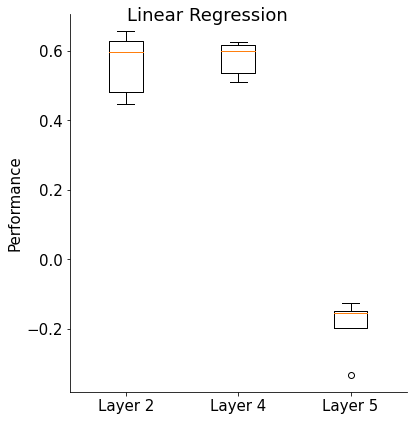

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Linear Regression')
ax = fig.add_subplot(111)
ax.boxplot(outcome)
ax.set_xticklabels(['Layer 2', 'Layer 4', 'Layer 5'])
ax.set_ylabel('Performance (r2)')
plt.show()

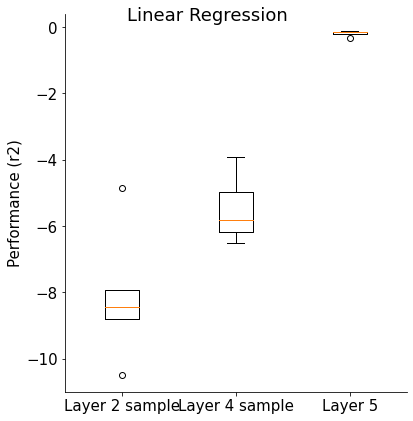

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Linear Regression')
ax = fig.add_subplot(111)
ax.boxplot(outcome_sample)
ax.set_xticklabels(['Layer 2 sample', 'Layer 4 sample', 'Layer 5'])
ax.set_ylabel('Performance (r2)')
plt.show()

# Linear regression across layers

In [ ]:
# Layer 2/3 to layer 4 
X = l2.T
y = l4.T

# Create linear regression object
regr = linear_model.LinearRegression()


scores_l2_l4 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l2_l4.mean(), scores_l2_l4.std() * 2))

Accuracy: -0.65 (+/- 0.43)


In [ ]:
# Layer 2/3 to layer 5

X = l2.T
y = l5.T

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l2_l5 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l2_l5.mean(), scores_l2_l5.std() * 2))

Accuracy: -0.71 (+/- 0.53)


In [ ]:
# Layer 4 to layer 5 

X = l4.T
y = l5.T

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l4_l5 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l4_l5.mean(), scores_l4_l5.std() * 2))

NameError: ignored

In [ ]:
# Layer 4 to layer 2

X = l4.T
y = l2.T

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l4_l2 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l4_l2.mean(), scores_l4_l2.std() * 2))

In [ ]:
print(score_l4_l2)

In [ ]:
# Layer 5 to layer 2

X = l5.T
y = l2.T

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l5_l2 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l5_l2.mean(), scores_l5_l2.std() * 2))

Accuracy: -4.75 (+/- 1.32)


In [ ]:
print(scores_l5_l2)

[-5.8113759  -5.18055498 -4.19378922 -4.06310162 -4.47845519]


In [ ]:
# Layer 5 to layer 4

X = l5.T
y = l4.T

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l5_l4 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l5_l4.mean(), scores_l5_l4.std() * 2))

Accuracy: -3.34 (+/- 0.62)


In [ ]:
print(scores_l5_l4)

[-3.91940769 -3.23977905 -3.04698448 -3.11885493 -3.37002302]


In [ ]:

outcome_layers = [scores_l2_l5, scores_l2_l4, scores_l4_l5]


In [ ]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Linear Regression across layers')
ax = fig.add_subplot(111)
ax.boxplot(outcome_layers)
ax.set_xticklabels(['Layer 2 -> 5', 'Layer 2 -> 4', 'Layer 4 -> 5'])
ax.set_ylabel('Mean Squared Error')
plt.show()

In [ ]:
print(scores_l2_l5) 
print(scores_l2_l4) 
print(scores_l4_l5)
print(scores_l4_l2)
print(scores_l5_l4)
print(scores_l5_l2)

[-1.16125572 -0.41666945 -0.52938743 -0.59826499 -0.84063971]
[-1.02499857 -0.42371222 -0.49612573 -0.54646616 -0.73910534]
[-1.01975491 -0.58433973 -0.60043808 -0.6334437  -0.8391878 ]


NameError: ignored